In [1]:
import numpy as np
import pandas as pd
import scipy.stats as ss
import scikit_posthocs as sp

import matplotlib.pyplot as plt

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x152308550>)

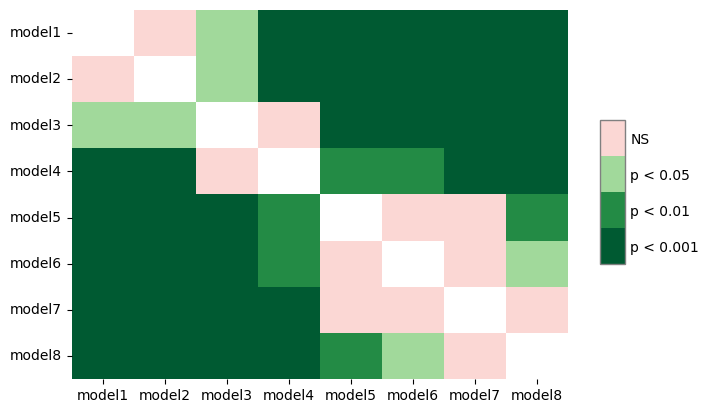

In [2]:
rng = np.random.default_rng(1)
dict_data = {
    'model1': rng.normal(loc=0.2, scale=0.1, size=30),
    'model2': rng.normal(loc=0.2, scale=0.1, size=30),
    'model3': rng.normal(loc=0.4, scale=0.1, size=30),
    'model4': rng.normal(loc=0.5, scale=0.1, size=30),
    'model5': rng.normal(loc=0.7, scale=0.1, size=30),
    'model6': rng.normal(loc=0.7, scale=0.1, size=30),
    'model7': rng.normal(loc=0.8, scale=0.1, size=30),
    'model8': rng.normal(loc=0.9, scale=0.1, size=30),
}
data = (
  pd.DataFrame(dict_data)
  .rename_axis('cv_fold')
  .melt(
      var_name='estimator',
      value_name='score',
      ignore_index=False,
  )
  .reset_index()
)

avg_rank = data.groupby('cv_fold').score.rank(pct=True).groupby(data.estimator).mean()
ss.friedmanchisquare(*dict_data.values())

test_results = sp.posthoc_conover_friedman(
    data,
    melted=True,
    block_col='cv_fold',
    group_col='estimator',
    y_col='score',
)
sp.sign_plot(test_results)


{'markers': [<matplotlib.collections.PathCollection at 0x152295d50>,
 'elbows': [<matplotlib.lines.Line2D at 0x1532ab690>,
 'labels': [Text(0.18166666666666667, -3, 'model2 (0.19)'),
  Text(0.18166666666666667, -4, 'model1 (0.21)'),
  Text(0.18166666666666667, -5, 'model3 (0.37)'),
  Text(0.18166666666666667, -6, 'model4 (0.5)'),
  Text(0.9516666666666667, -3, '(0.94) model8'),
  Text(0.9516666666666667, -4, '(0.85) model7'),
  Text(0.9516666666666667, -5, '(0.74) model6'),
  Text(0.9516666666666667, -6, '(0.71) model5')],
 'crossbars': [[<matplotlib.lines.Line2D at 0x1522d7250>],
  [<matplotlib.lines.Line2D at 0x1532aac90>]]}

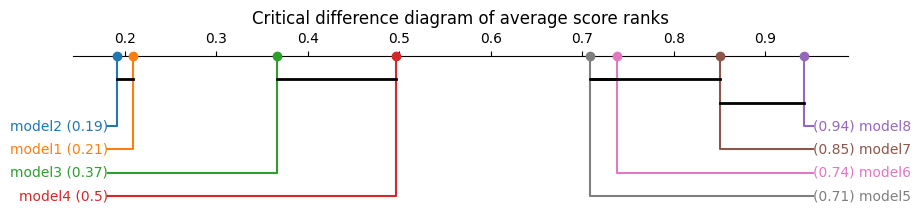

In [4]:
plt.figure(figsize=(10, 2), dpi=100)
plt.title('Critical difference diagram of average score ranks')
sp.critical_difference_diagram(avg_rank, test_results)